In [1]:
install.packages("tensorflow")

also installing the dependencies ‘rprojroot’, ‘RcppTOML’, ‘here’, ‘png’, ‘whisker’, ‘config’, ‘reticulate’, ‘tfruns’, ‘tfautograph’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(reticulate)
path_to_python <- install_python()
virtualenv_create("r-reticulate", python = path_to_python)

Installing pyenv ...
Done! pyenv has been installed to '/home/datalore/.local/share/r-reticulate/pyenv/bin/pyenv'.


+ '/home/datalore/.local/share/r-reticulate/pyenv/libexec/pyenv' install --skip-existing 3.9.17



ERROR: ERROR: Error: installation of Python 3.9.17 failed


In [3]:
library(tensorflow)
install_tensorflow(envname="r-reticulate")

Using Python: /opt/anaconda3/bin/python3.8
Creating virtual environment 'r-reticulate' ... 
Done!
Installing packages: 'pip', 'wheel', 'setuptools', 'numpy'
Virtual environment 'r-reticulate' successfully created.
Using virtual environment 'r-reticulate' ...

Installation complete.



+ '/opt/anaconda3/bin/python3.8' -m venv '/home/datalore/.virtualenvs/r-reticulate'

+ '/home/datalore/.virtualenvs/r-reticulate/bin/python' -m pip install --upgrade --no-user 'pip' 'wheel' 'setuptools' 'numpy'

+ '/home/datalore/.virtualenvs/r-reticulate/bin/python' -m pip install --upgrade --no-user --ignore-installed 'tensorflow==2.11.*'



In [4]:
install.packages("keras")
library(keras)
install_keras(envname="r-reticulate")

Using virtual environment 'r-reticulate' ...

Installation complete.



also installing the dependency ‘zeallot’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

+ '/home/datalore/.virtualenvs/r-reticulate/bin/python' -m pip install --upgrade --no-user --ignore-installed 'tensorflow==2.11.*' 'tensorflow-hub' 'tensorflow-datasets' 'scipy' 'requests' 'Pillow' 'h5py' 'pandas' 'pydot'



In [5]:
library(tensorflow)
tf$constant("Witaj Tensoflow!")

tf.Tensor(b'Witaj Tensoflow!', shape=(), dtype=string)

In [6]:
fashion_mnist <- dataset_fashion_mnist()
c(train_images,train_labels) %<-% fashion_mnist$train
c(test_images,test_labels) %<-% fashion_mnist$test

In [7]:
class_names = c('T-shirt/top',
'Trouser',
'Pullover',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankle boot')

In [8]:
dim(train_images)

60000 28 28

In [9]:
dim(train_labels)

60000

In [10]:
train_labels[1:20]

9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4

In [11]:
dim(test_images)

10000 28 28

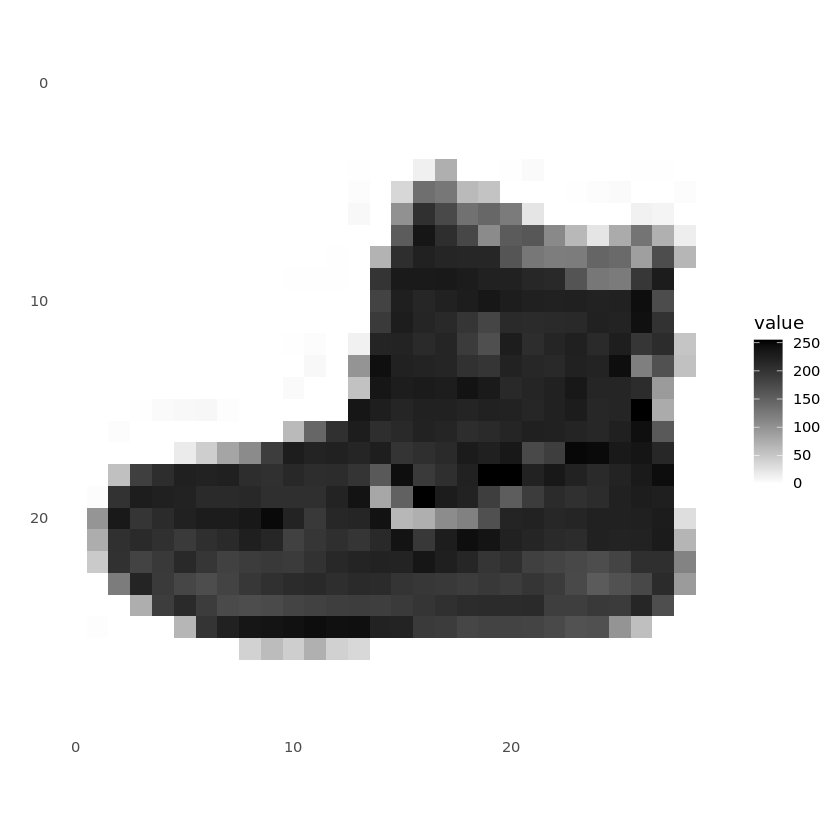

In [12]:
#Preprocessing danych
library(tidyr)
library(ggplot2)

image_1 <- as.data.frame(train_images[1, , ])
colnames(image_1) <- seq_len(ncol(image_1))
image_1$y <- seq_len(nrow(image_1))
image_1 <- gather(image_1,"x","value",-y)
image_1$x <- as.integer(image_1$x)

ggplot(image_1, aes(x=x,y=y,fill=value)) + 
    geom_tile() + 
    scale_fill_gradient(low="white", high="black", na.value=NA) + 
    scale_y_reverse() +
    theme_minimal() +
    theme(panel.grid = element_blank()) +
    theme(aspect.ratio = 1) +
    xlab("") + 
    ylab("")

In [13]:
#normalizacja zbiorów
train_images <- train_images/255
test_images <- test_images/255

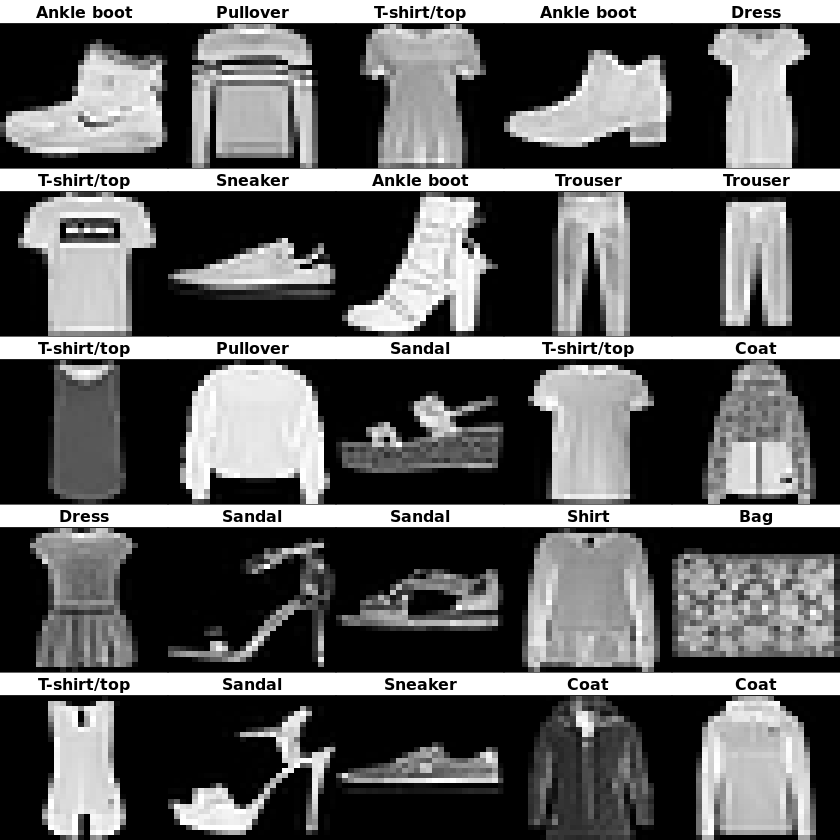

In [16]:
par(mfcol=c(5,5))
par(mar=c(0,0,1.5,0), xaxs = 'i', yaxs = 'i')

for (i in 1:25){
    img<-train_images[i, , ]
    img<-t(apply(img,2,rev))
    image(1:28,1:28,img,col=gray((0:255)/255),xaxt='n', yaxt='n',main=paste(class_names[train_labels[i]+1]))
}

In [17]:
#budowa modelu

model <- keras_model_sequential()
model %>%
    layer_flatten(input_shape = c(28,28)) %>%
    layer_dense(units = 128, activation = 'relu') %>%
    layer_dense(units = 10,activation = 'softmax')

In [18]:
model %>% compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = c('accuracy')
)

In [19]:
model %>% fit(train_images,train_labels,epochs = 5,verbose = 2)

In [20]:
#ewaluacja modelu
score <- model %>% evaluate(test_images,test_labels,verbose = 0)
cat('test loss:',score['loss'],"\n")
cat('test accuracy:',score['accuracy'],"\n")

test loss: 0.3370173 
test accuracy: 0.8819 


In [31]:
predictions<-model %>% predict(test_images)

In [32]:
predictions[1, ]

3.84340892196633e-05 5.41804867637552e-09 4.50660718342988e-06 8.56849968755569e-09 1.31963815874769e-05 0.00325802247971296 9.34947365749395e-06 0.0526403114199638 0.000304810499073938 0.943731427192688

In [33]:
which.max(predictions[1, ])

10

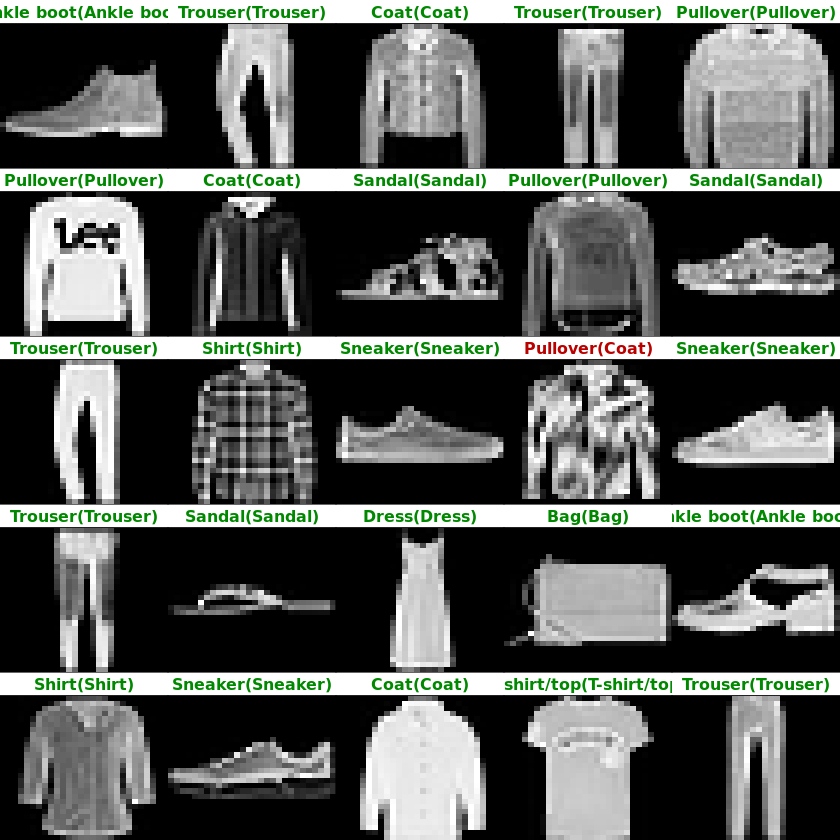

In [37]:
par(mfcol = c(5,5))
par(mar = c(0,0,1.5,0),xaxs = 'i',yaxs='i')
for (i in 1:25){
    img <- test_images[i, , ]
    img <- t(apply(img,2,rev))
    predicted_label <- which.max(predictions[i, ]) - 1
    true_label <- test_labels[i]
    if (predicted_label == true_label){
        color <- '#008800'
    }else{
        color <- '#BB0000'
    }
    image(1:28,1:28,img,col=gray((0:255)/255),xaxt='n', yaxt='n',
    main =paste0(class_names[predicted_label+1],"(",
    class_names[true_label+1],")"), col.main = color)
}

In [26]:
img <- test_images[1, , , drop=FALSE]
dim(img)

1 28 28

In [35]:
preds <- model %>% predict(img)
preds

5.115716e-06,3.379016e-13,4.087428e-08,1.600997e-10,5.440841e-09,5.549563e-08,1.520866e-06,1.300968e-05,0.99998,2.896161e-07


In [36]:
prediction <- preds[1, ] -1
which.max(preds)

9